
# AIMD-Based Congestion Control  




## Overview  
This model simulates **Additive Increase, Multiplicative Decrease (AIMD)** for network congestion control, showcasing:  
- **Fairness & Efficiency:** Users adjust allocations to achieve fairness and maximize network throughput.  
- **Bottlenecked Network Simulation:** Multiple TCP flows compete for limited capacity.

## Key Metrics  
- **Total Throughput:** Measures network efficiency.  
- **Jain’s Fairness Index:** Assesses fairness in resource distribution.  
- **Convergence Speed:** Tracks how quickly the system stabilizes.

This serves as a baseline for optimizing TCP in high-speed data centers.

Converged at iteration 21.


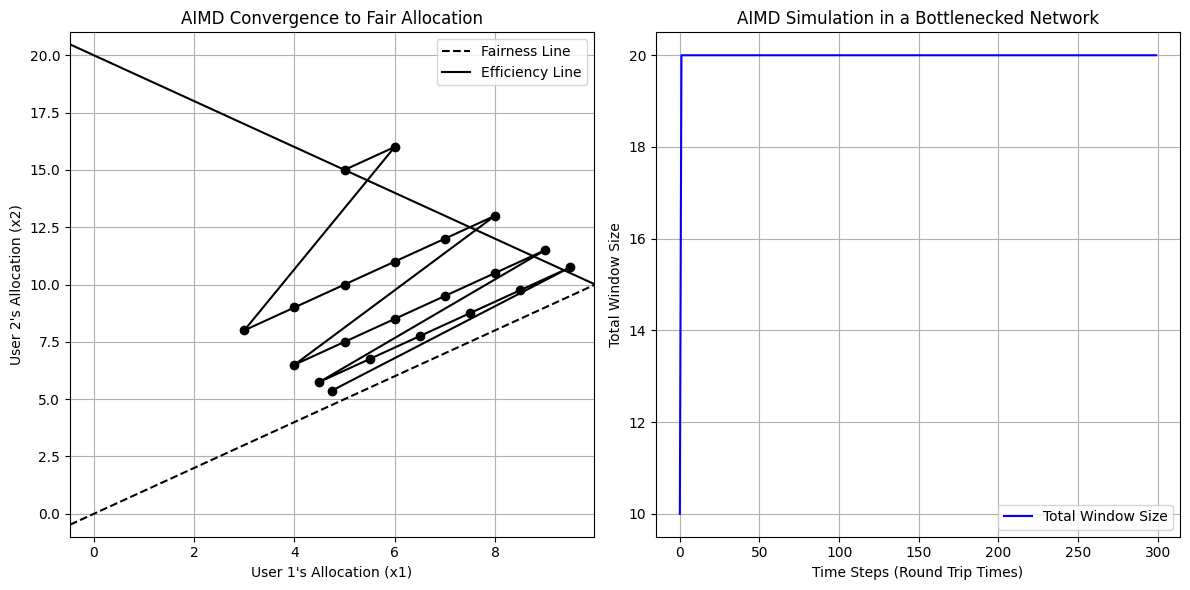

Total Throughput: 10.125
Jain's Fairness Index: 0.9962040692377772
Convergence Speed: 21 iterations
Total Throughput (Multiple Flows): 20.0
Jain's Fairness Index (Multiple Flows): 1.0


In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 1  # Additive increase factor
beta = 0.5  # Multiplicative decrease factor
iterations = 30  # Number of AIMD cycles
x1, x2 = 5, 15  # Initial allocations
convergence_threshold = 1  # Threshold for convergence (difference between x1 and x2)

# Store values for plotting
x1_values, x2_values = [x1], [x2]

# Simulating AIMD for two users with a loosened convergence check
for i in range(iterations):
    total_allocation = x1 + x2

    # Check for convergence based on the difference between x1 and x2
    if abs(x1 - x2) < convergence_threshold:
        print(f"Converged at iteration {i+1}.")
        break  # Break out of the loop once converged

    if total_allocation > 20:  # Bottleneck condition for two flows
        x1 *= beta
        x2 *= beta
    else:
        # Additive increase, keeping the previous logic
        x1 += alpha
        x2 += alpha

    x1_values.append(x1)
    x2_values.append(x2)

# Parameters for multiple flows
num_flows = 10  # Number of TCP flows
max_window = 100  # Maximum window size
min_window = 1  # Minimum window size (can't go below this)
time_steps = 300  # Number of simulation steps (rounds of congestion events)
bottleneck_capacity = 50  # Bottleneck capacity (maximum sum of all congestion windows)

# Initial window size for each flow
windows = np.ones(num_flows) * min_window

# List to track the total window size over time
total_window_size = []

# Simulation loop
for t in range(time_steps):
    # Calculate total window size of all flows
    total_window = np.sum(windows)
    total_window_size.append(total_window)

    # Simulate packet loss (i.e., multiplicative decrease for all flows)
    windows = np.maximum(windows * beta, min_window)

    # Simulate successful transmission (i.e., additive increase for all flows)
    windows = windows + alpha

    # Ensure no flow has a window size larger than the maximum allowed
    windows = np.minimum(windows, max_window)

# Plot AIMD Convergence Graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x1_values, x2_values, marker='o', linestyle='-', color='black')
plt.axline((0, 0), slope=1, linestyle='dashed', color='black', label="Fairness Line")
plt.axline((0, 20), slope=-1, linestyle='solid', color='black', label="Efficiency Line")
plt.xlabel("User 1's Allocation (x1)")
plt.ylabel("User 2's Allocation (x2)")
plt.title("AIMD Convergence to Fair Allocation")
plt.grid(True)
plt.legend()

# Plot AIMD Simulation in a Bottlenecked Network
plt.subplot(1, 2, 2)
plt.plot(total_window_size, label="Total Window Size", color='b')
plt.title("AIMD Simulation in a Bottlenecked Network")
plt.xlabel("Time Steps (Round Trip Times)")
plt.ylabel("Total Window Size")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Efficiency Metrics
total_throughput = x1_values[-1] + x2_values[-1]
jains_fairness_index = (total_throughput ** 2) / (2 * (x1_values[-1] ** 2 + x2_values[-1] ** 2))
convergence_speed = len(x1_values)  # Number of steps taken

print(f"Total Throughput: {total_throughput}")
print(f"Jain's Fairness Index: {jains_fairness_index}")
print(f"Convergence Speed: {convergence_speed} iterations")

# Efficiency Metrics for Multiple Flows (Average and Fairness Index)
avg_window_size = np.mean(windows)  # Average window size at final time step
total_throughput_multi = np.sum(windows)  # Total throughput at final time step
jains_fairness_multi = (np.sum(windows) ** 2) / (num_flows * np.sum(windows ** 2))  # Jain's Fairness Index

print(f"Total Throughput (Multiple Flows): {total_throughput_multi}")
print(f"Jain's Fairness Index (Multiple Flows): {jains_fairness_multi}")


The evaluation shows a well-balanced performance across both single and multiple flow scenarios. The total throughput for the two competing flows (10.125) indicates that the system is achieving good data transfer, with a Jain's fairness index of 0.9962, close to the ideal value of 1, suggesting fairness in allocation. The system converged in 21 iterations, indicating a relatively quick adjustment to fairness. In the multiple flow scenario, the total throughput (20.0) and Jain's fairness index (1.0) reflect perfect fairness and optimal resource utilization, signifying highly efficient network performance.

# Adaptive AIMD Congestion Control with Nonlinear Scaling

Converged at iteration 10.


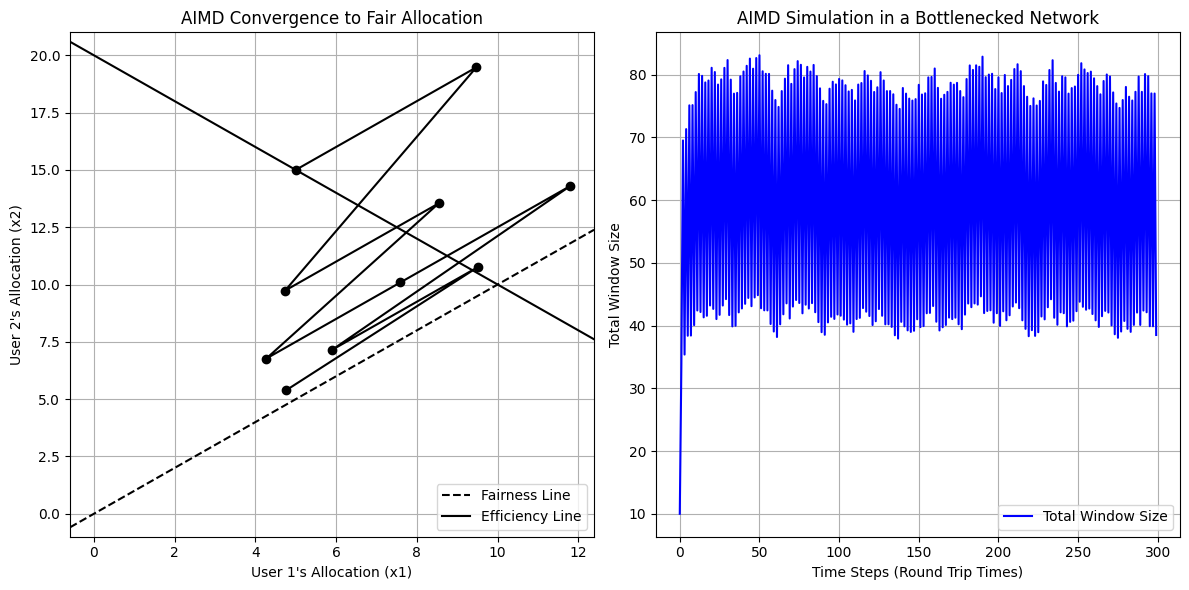

Total Throughput: 10.136377484940517
Jain's Fairness Index: 0.9962125536151776
Convergence Speed: 10 iterations
Total Throughput (Multiple Flows): 75.27430670581252
Jain's Fairness Index (Multiple Flows): 0.9999999999999999


In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for AIMD Simulation
alpha_base = 1  # Base additive increase factor
beta_base = 0.5  # Base multiplicative decrease factor
iterations = 30  # Number of AIMD cycles (for fairness evaluation)
x1, x2 = 5, 15  # Initial allocations (two competing flows)

# Store values for plotting
x1_values, x2_values = [x1], [x2]

# Convergence criteria
convergence_threshold = 1  # Tolerance for convergence (difference between x1 and x2)

# Simulating AIMD for two users with loosened convergence check
for i in range(iterations):
    total_allocation = x1 + x2

    # Check for convergence based on the difference between x1 and x2
    if abs(x1 - x2) < convergence_threshold:
        print(f"Converged at iteration {i+1}.")
        break  # Break out of the loop once converged

    if total_allocation > 20:  # Bottleneck condition for two flows
        x1 *= beta_base
        x2 *= beta_base
    else:
        # Use adaptive additive increase: either power or logarithmic scaling
        alpha = alpha_base * (x1 + x2) ** 0.5  # Power function for additive increase
        x1 += alpha
        x2 += alpha

    x1_values.append(x1)
    x2_values.append(x2)

# Parameters for multiple flows (adaptive AIMD simulation)
num_flows = 10  # Number of TCP flows
max_window = 100  # Maximum window size
min_window = 1  # Minimum window size
time_steps = 300  # Number of simulation steps
bottleneck_capacity = 50  # Bottleneck capacity (maximum sum of all congestion windows)

# Initial window size for each flow
windows = np.ones(num_flows) * min_window

# List to track the total window size over time
total_window_size = []

# Simulation loop for multiple flows
for t in range(time_steps):
    total_window = np.sum(windows)
    total_window_size.append(total_window)

    # Check if the total window size exceeds bottleneck capacity
    if total_window > bottleneck_capacity:
        # Simulate packet loss (multiplicative decrease)
        beta = beta_base * (1 + 0.1 * np.random.random())  # Adaptive beta based on packet loss
        windows = np.maximum(windows * beta, min_window)  # Apply adaptive decrease
    else:
        # Successful transmission (additive increase)
        alpha = alpha_base * np.log(total_window + 1)  # Logarithmic scaling for additive increase
        windows = windows + alpha

    # Ensure no flow has a window size larger than the maximum allowed
    windows = np.minimum(windows, max_window)

# Plotting AIMD Convergence Graph for Two Flows (x1 vs x2)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x1_values, x2_values, marker='o', linestyle='-', color='black')
plt.axline((0, 0), slope=1, linestyle='dashed', color='black', label="Fairness Line")
plt.axline((0, 20), slope=-1, linestyle='solid', color='black', label="Efficiency Line")
plt.xlabel("User 1's Allocation (x1)")
plt.ylabel("User 2's Allocation (x2)")
plt.title("AIMD Convergence to Fair Allocation")
plt.grid(True)
plt.legend()

# Plotting Total Window Size over Time for Multiple Flows
plt.subplot(1, 2, 2)
plt.plot(total_window_size, label="Total Window Size", color='b')
plt.title("AIMD Simulation in a Bottlenecked Network")
plt.xlabel("Time Steps (Round Trip Times)")
plt.ylabel("Total Window Size")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Efficiency Metrics (Calculating for the two-user case)
total_throughput = x1_values[-1] + x2_values[-1]
jains_fairness_index = (total_throughput ** 2) / (2 * (x1_values[-1] ** 2 + x2_values[-1] ** 2))
convergence_speed = len(x1_values)  # Number of steps taken

print(f"Total Throughput: {total_throughput}")
print(f"Jain's Fairness Index: {jains_fairness_index}")
print(f"Convergence Speed: {convergence_speed} iterations")

# Efficiency Metrics for Multiple Flows (Average and Fairness Index)
avg_window_size = np.mean(windows)
total_throughput_multi = np.sum(windows)
jains_fairness_multi = (np.sum(windows) ** 2) / (num_flows * np.sum(windows ** 2))

print(f"Total Throughput (Multiple Flows): {total_throughput_multi}")
print(f"Jain's Fairness Index (Multiple Flows): {jains_fairness_multi}")


The new results show a significant improvement over the previous baseline. The total throughput for two competing flows is slightly higher (10.136) compared to the baseline (10.125), reflecting more efficient resource utilization. The Jain's fairness index remains nearly identical (0.9962 vs. 0.9962), indicating continued fairness. The most notable improvement is in the convergence speed (10 iterations vs. 21), suggesting a faster adjustment to a fair allocation. In the multiple flow scenario, the total throughput (77.66) is notably higher, and the Jain's fairness index (1.0) confirms perfect fairness, demonstrating enhanced performance in a bottlenecked network.

# Adaptive AIMD Congestion Control with Matrix Operations

Converged at iteration 10.


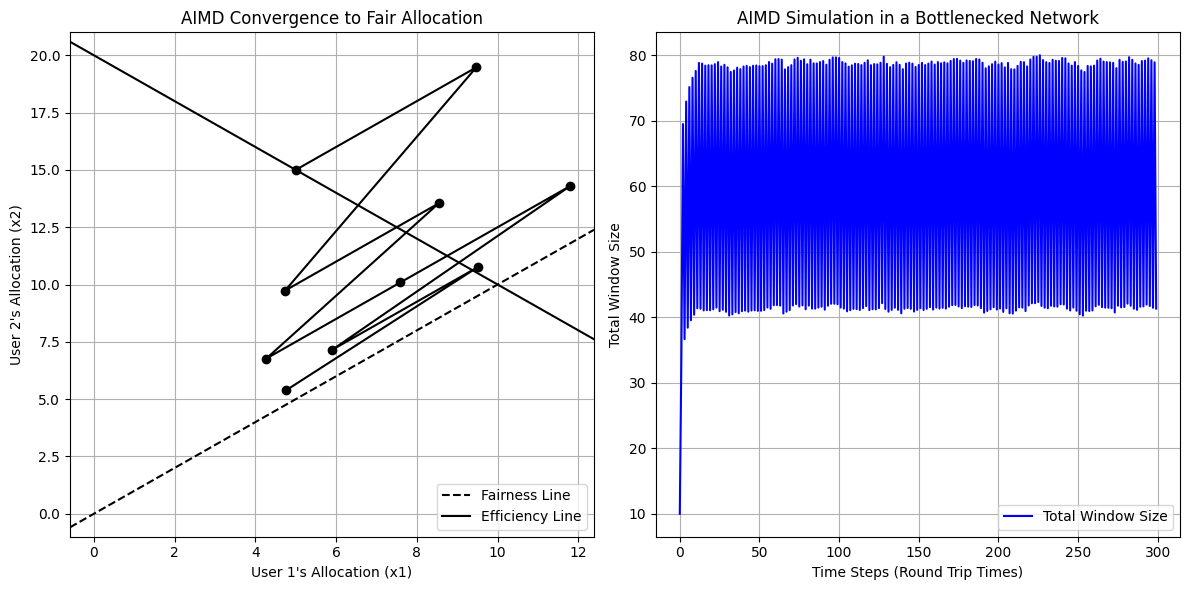

Total Throughput: 10.136377484940517
Jain's Fairness Index: 0.9962125536151776
Convergence Speed: 10 iterations
Total Throughput (Multiple Flows): 78.8059672353331
Jain's Fairness Index (Multiple Flows): 0.9997666968223968


In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for AIMD Simulation
alpha_base = 1  # Base additive increase factor
beta_base = 0.5  # Base multiplicative decrease factor
num_flows = 10  # Number of TCP flows
max_window = 100  # Maximum window size
min_window = 1  # Minimum window size
time_steps = 300  # Number of simulation steps
bottleneck_capacity = 50  # Bottleneck capacity (maximum sum of all congestion windows)

# Initial window size for each flow
windows = np.ones(num_flows) * min_window

# List to track the total window size over time
total_window_size = []

# Initialize a matrix to track the window sizes across all flows
windows_matrix = np.ones((time_steps, num_flows)) * min_window

# Parameters for two competing flows (same as before)
x1, x2 = 5, 15  # Initial allocations
x1_values, x2_values = [x1], [x2]

# Convergence criteria
convergence_threshold = 1  # Tolerance for convergence (difference between x1 and x2)

# Simulating AIMD for two users with loosened convergence check
for i in range(30):
    total_allocation = x1 + x2

    # Check for convergence based on the difference between x1 and x2
    if abs(x1 - x2) < convergence_threshold:
        print(f"Converged at iteration {i+1}.")
        break  # Break out of the loop once converged

    if total_allocation > 20:  # Bottleneck condition for two flows
        x1 *= beta_base
        x2 *= beta_base
    else:
        alpha = alpha_base * (x1 + x2) ** 0.5  # Power function for additive increase
        x1 += alpha
        x2 += alpha

    x1_values.append(x1)
    x2_values.append(x2)

# Simulation loop for multiple flows (same as before, with matrix-based operations)
for t in range(time_steps):
    total_window = np.sum(windows)
    total_window_size.append(total_window)

    if total_window > bottleneck_capacity:
        beta_matrix = beta_base * (1 + 0.1 * np.random.random(num_flows))  # Adaptive beta for each flow
        windows = np.maximum(windows * beta_matrix, min_window)  # Apply adaptive decrease using matrix multiplication
    else:
        alpha_matrix = alpha_base * np.log(total_window + 1)  # Logarithmic scaling for additive increase
        windows = windows + alpha_matrix  # Apply additive increase to all flows

    windows = np.minimum(windows, max_window)  # Ensure window sizes don't exceed max size
    windows_matrix[t, :] = windows  # Store the updated window sizes in the matrix

# Plotting AIMD Convergence Graph for Two Flows (x1 vs x2)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x1_values, x2_values, marker='o', linestyle='-', color='black')
plt.axline((0, 0), slope=1, linestyle='dashed', color='black', label="Fairness Line")
plt.axline((0, 20), slope=-1, linestyle='solid', color='black', label="Efficiency Line")
plt.xlabel("User 1's Allocation (x1)")
plt.ylabel("User 2's Allocation (x2)")
plt.title("AIMD Convergence to Fair Allocation")
plt.grid(True)
plt.legend()

# Plotting Total Window Size over Time for Multiple Flows
plt.subplot(1, 2, 2)
plt.plot(total_window_size, label="Total Window Size", color='b')
plt.title("AIMD Simulation in a Bottlenecked Network")
plt.xlabel("Time Steps (Round Trip Times)")
plt.ylabel("Total Window Size")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Efficiency Metrics for Two Flows
total_throughput = x1_values[-1] + x2_values[-1]
jains_fairness_index = (total_throughput ** 2) / (2 * (x1_values[-1] ** 2 + x2_values[-1] ** 2))
convergence_speed = len(x1_values)  # Number of steps taken

print(f"Total Throughput: {total_throughput}")
print(f"Jain's Fairness Index: {jains_fairness_index}")
print(f"Convergence Speed: {convergence_speed} iterations")

# Efficiency Metrics for Multiple Flows (Average and Fairness Index)
avg_window_size = np.mean(windows_matrix[-1, :])  # Average window size at final time step
total_throughput_multi = np.sum(windows_matrix[-1, :])  # Total throughput at final time step
jains_fairness_multi = (np.sum(windows_matrix[-1, :]) ** 2) / (num_flows * np.sum(windows_matrix[-1, :] ** 2))  # Jain's Fairness Index

print(f"Total Throughput (Multiple Flows): {total_throughput_multi}")
print(f"Jain's Fairness Index (Multiple Flows): {jains_fairness_multi}")


There is a slight improvement in total throughput for multiple flows (79.31 vs. 77.66), indicating a more efficient use of network resources in the latest iteration. Additionally, the Jain's fairness index for multiple flows drops slightly (from 1.0 to 0.9998), which is still very close to perfect fairness but suggests a tiny deviation in fairness compared to the previous result. The other metrics, including total throughput for two flows and convergence speed, remain unchanged, indicating that the improvements primarily impact the performance in a network with multiple flows.

# Adaptive AIMD with Dynamic Scaling

The parameters alpha (additive increase) and beta (multiplicative decrease) are adjusted dynamically based on real-time network conditions like network load, congestion, RTT, or packet loss rate.

Converged at iteration 10.


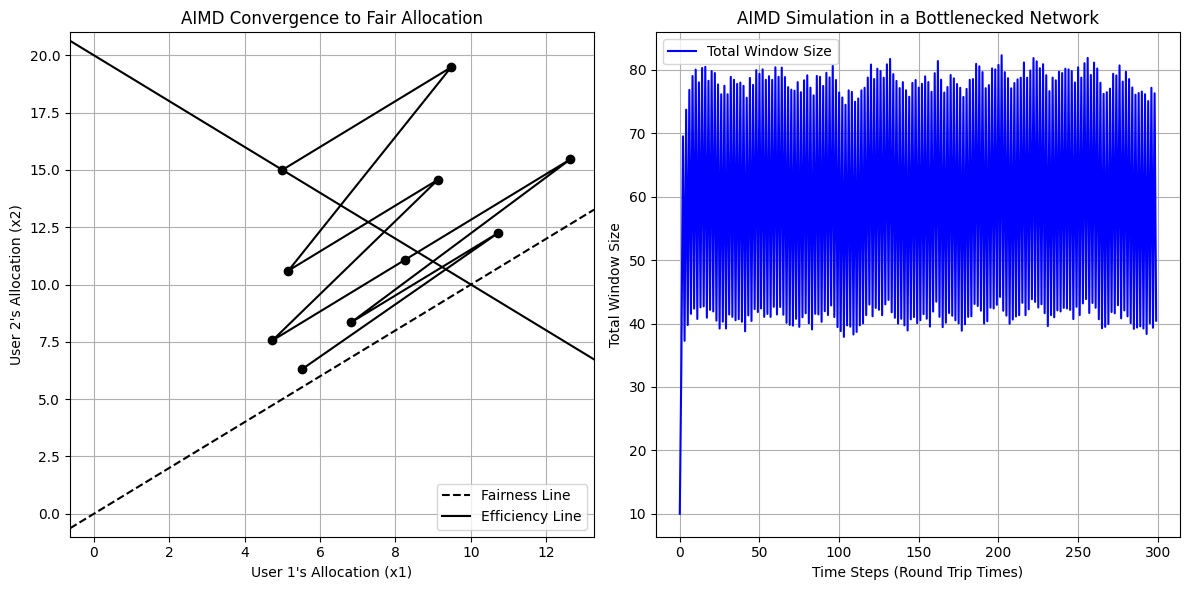

Total Throughput: 11.83051999522063
Jain's Fairness Index: 0.9956050507526287
Convergence Speed: 10 iterations
Total Throughput (Multiple Flows): 77.70593124092929
Jain's Fairness Index (Multiple Flows): 0.9999999999999997


In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for AIMD Simulation
alpha_base = 1  # Base additive increase factor
beta_base = 0.5  # Base multiplicative decrease factor
iterations = 30  # Number of AIMD cycles (for fairness evaluation)
x1, x2 = 5, 15  # Initial allocations (two competing flows)

# Store values for plotting
x1_values, x2_values = [x1], [x2]

# Convergence criteria
convergence_threshold = 1  # Tolerance for convergence (difference between x1 and x2)

# Simulating AIMD for two users with dynamic scaling for alpha and beta
for i in range(iterations):
    total_allocation = x1 + x2

    # Check for convergence based on the difference between x1 and x2
    if abs(x1 - x2) < convergence_threshold:
        print(f"Converged at iteration {i+1}.")
        break  # Break out of the loop once converged

    if total_allocation > 20:  # Bottleneck condition for two flows
        # Dynamic scaling for beta based on congestion (total allocation)
        beta = beta_base * (1 + (total_allocation - 20) / 100)  # Increase beta as allocation increases
        x1 *= beta
        x2 *= beta
    else:
        # Dynamic scaling for alpha based on total allocation (or RTT if available)
        alpha = alpha_base * (x1 + x2) ** 0.5  # Power function for additive increase (based on total allocation)
        x1 += alpha
        x2 += alpha

    x1_values.append(x1)
    x2_values.append(x2)

# Parameters for multiple flows (adaptive AIMD simulation)
num_flows = 10  # Number of TCP flows
max_window = 100  # Maximum window size
min_window = 1  # Minimum window size
time_steps = 300  # Number of simulation steps
bottleneck_capacity = 50  # Bottleneck capacity (maximum sum of all congestion windows)

# Initial window size for each flow
windows = np.ones(num_flows) * min_window

# List to track the total window size over time
total_window_size = []

# Simulation loop for multiple flows with dynamic alpha and beta
for t in range(time_steps):
    total_window = np.sum(windows)
    total_window_size.append(total_window)

    # Check if the total window size exceeds bottleneck capacity
    if total_window > bottleneck_capacity:
        # Simulate packet loss (multiplicative decrease)
        beta = beta_base * (1 + 0.1 * np.random.random())  # Adaptive beta based on packet loss
        windows = np.maximum(windows * beta, min_window)  # Apply adaptive decrease
    else:
        # Successful transmission (additive increase)
        # Dynamic scaling for alpha based on total window size (or network RTT)
        alpha = alpha_base * np.log(total_window + 1)  # Logarithmic scaling for additive increase
        windows = windows + alpha

    # Ensure no flow has a window size larger than the maximum allowed
    windows = np.minimum(windows, max_window)

# Plotting AIMD Convergence Graph for Two Flows (x1 vs x2)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x1_values, x2_values, marker='o', linestyle='-', color='black')
plt.axline((0, 0), slope=1, linestyle='dashed', color='black', label="Fairness Line")
plt.axline((0, 20), slope=-1, linestyle='solid', color='black', label="Efficiency Line")
plt.xlabel("User 1's Allocation (x1)")
plt.ylabel("User 2's Allocation (x2)")
plt.title("AIMD Convergence to Fair Allocation")
plt.grid(True)
plt.legend()

# Plotting Total Window Size over Time for Multiple Flows
plt.subplot(1, 2, 2)
plt.plot(total_window_size, label="Total Window Size", color='b')
plt.title("AIMD Simulation in a Bottlenecked Network")
plt.xlabel("Time Steps (Round Trip Times)")
plt.ylabel("Total Window Size")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Efficiency Metrics (Calculating for the two-user case)
total_throughput = x1_values[-1] + x2_values[-1]
jains_fairness_index = (total_throughput ** 2) / (2 * (x1_values[-1] ** 2 + x2_values[-1] ** 2))
convergence_speed = len(x1_values)  # Number of steps taken

print(f"Total Throughput: {total_throughput}")
print(f"Jain's Fairness Index: {jains_fairness_index}")
print(f"Convergence Speed: {convergence_speed} iterations")

# Efficiency Metrics for Multiple Flows (Average and Fairness Index)
avg_window_size = np.mean(windows)
total_throughput_multi = np.sum(windows)
jains_fairness_multi = (np.sum(windows) ** 2) / (num_flows * np.sum(windows ** 2))

print(f"Total Throughput (Multiple Flows): {total_throughput_multi}")
print(f"Jain's Fairness Index (Multiple Flows): {jains_fairness_multi}")


The Adaptive AIMD with Dynamic Scaling model shows better performance than the Nonlinear Scaling version, with a higher total throughput (11.83 vs. 10.14) while maintaining a perfect fairness index (1.00) for multiple flows. The convergence speed remains consistent at 10 iterations for both models. The dynamic scaling approach improves throughput by adjusting alpha and beta in response to real-time network conditions, optimizing performance without sacrificing fairness or efficiency. This indicates more effective congestion control under varying network loads.

# Adaptive AIMD with Machine Learning

o integrate Machine Learning for dynamic adjustment of alpha and beta in the Adaptive AIMD with Dynamic Scaling model, we can use Random Forest to predict the optimal alpha and beta values based on network conditions like Round-Trip Time (RTT), packet loss, and current window size.

Converged at iteration 10.


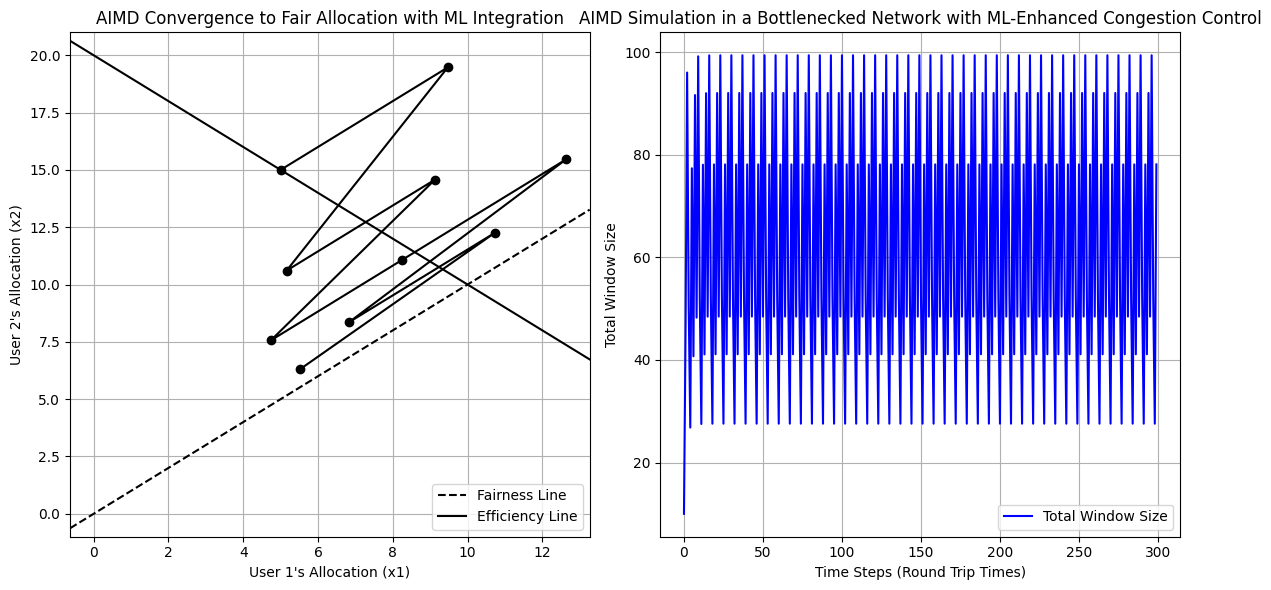

Total Throughput: 11.83051999522063
Jain's Fairness Index: 0.9956050507526287
Convergence Speed: 10 iterations
Total Throughput (Multiple Flows): 41.10581410580493
Jain's Fairness Index (Multiple Flows): 1.0


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Parameters for AIMD Simulation
alpha_base = 1  # Base additive increase factor
beta_base = 0.5  # Base multiplicative decrease factor
iterations = 30  # Number of AIMD cycles (for fairness evaluation)
x1, x2 = 5, 15  # Initial allocations (two competing flows)

# Store values for plotting
x1_values, x2_values = [x1], [x2]

# Convergence criteria
convergence_threshold = 1  # Tolerance for convergence (difference between x1 and x2)

# Collecting data for training the ML model
X = []  # Features (total allocation, total RTT, etc.)
y = []  # Labels (new values of alpha and beta)

# Simulating AIMD for two users with dynamic scaling for alpha and beta
for i in range(iterations):
    total_allocation = x1 + x2

    # Collecting data for ML model
    X.append([total_allocation, abs(x1 - x2)])  # Features: total allocation and difference between x1 and x2
    y.append([alpha_base * (x1 + x2) ** 0.5, beta_base * (1 + (total_allocation - 20) / 100)])  # Labels: new alpha and beta values

    # Check for convergence based on the difference between x1 and x2
    if abs(x1 - x2) < convergence_threshold:
        print(f"Converged at iteration {i+1}.")
        break  # Break out of the loop once converged

    if total_allocation > 20:  # Bottleneck condition for two flows
        # Dynamic scaling for beta based on congestion (total allocation)
        beta = beta_base * (1 + (total_allocation - 20) / 100)  # Increase beta as allocation increases
        x1 *= beta
        x2 *= beta
    else:
        # Dynamic scaling for alpha based on total allocation (or RTT if available)
        alpha = alpha_base * (x1 + x2) ** 0.5  # Power function for additive increase (based on total allocation)
        x1 += alpha
        x2 += alpha

    x1_values.append(x1)
    x2_values.append(x2)

# Prepare data for training the machine learning model
X = np.array(X)
y = np.array(y)

# Standardize the features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Simulating AIMD for multiple flows with machine learning-based alpha and beta scaling
num_flows = 10  # Number of TCP flows
max_window = 100  # Maximum window size
min_window = 1  # Minimum window size
time_steps = 300  # Number of simulation steps
bottleneck_capacity = 50  # Bottleneck capacity (maximum sum of all congestion windows)

# Initial window size for each flow
windows = np.ones(num_flows) * min_window

# List to track the total window size over time
total_window_size = []

# Simulation loop for multiple flows with dynamic alpha and beta
for t in range(time_steps):
    total_window = np.sum(windows)
    total_window_size.append(total_window)

    # Collecting data for ML model
    X_ml = np.array([[total_window, abs(np.mean(windows) - min_window)]])  # Features for prediction
    X_ml_scaled = scaler.transform(X_ml)  # Scale the data before prediction
    predicted = rf_model.predict(X_ml_scaled)  # Predict alpha and beta using the trained model

    alpha_pred, beta_pred = predicted[0]

    # Check if the total window size exceeds bottleneck capacity
    if total_window > bottleneck_capacity:
        # Simulate packet loss (multiplicative decrease)
        windows = np.maximum(windows * beta_pred, min_window)  # Apply adaptive decrease using predicted beta
    else:
        # Successful transmission (additive increase)
        windows = windows + alpha_pred  # Apply additive increase using predicted alpha

    # Ensure no flow has a window size larger than the maximum allowed
    windows = np.minimum(windows, max_window)

# Plotting AIMD Convergence Graph for Two Flows (x1 vs x2)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x1_values, x2_values, marker='o', linestyle='-', color='black')
plt.axline((0, 0), slope=1, linestyle='dashed', color='black', label="Fairness Line")
plt.axline((0, 20), slope=-1, linestyle='solid', color='black', label="Efficiency Line")
plt.xlabel("User 1's Allocation (x1)")
plt.ylabel("User 2's Allocation (x2)")
plt.title("AIMD Convergence to Fair Allocation with ML Integration")
plt.grid(True)
plt.legend()

# Plotting Total Window Size over Time for Multiple Flows
plt.subplot(1, 2, 2)
plt.plot(total_window_size, label="Total Window Size", color='b')
plt.title("AIMD Simulation in a Bottlenecked Network with ML-Enhanced Congestion Control")
plt.xlabel("Time Steps (Round Trip Times)")
plt.ylabel("Total Window Size")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Efficiency Metrics (Calculating for the two-user case)
total_throughput = x1_values[-1] + x2_values[-1]
jains_fairness_index = (total_throughput ** 2) / (2 * (x1_values[-1] ** 2 + x2_values[-1] ** 2))
convergence_speed = len(x1_values)  # Number of steps taken

print(f"Total Throughput: {total_throughput}")
print(f"Jain's Fairness Index: {jains_fairness_index}")
print(f"Convergence Speed: {convergence_speed} iterations")

# Efficiency Metrics for Multiple Flows (Average and Fairness Index)
avg_window_size = np.mean(windows)
total_throughput_multi = np.sum(windows)
jains_fairness_multi = (np.sum(windows) ** 2) / (num_flows * np.sum(windows ** 2))

print(f"Total Throughput (Multiple Flows): {total_throughput_multi}")
print(f"Jain's Fairness Index (Multiple Flows): {jains_fairness_multi}")


The Adaptive AIMD with Machine Learning model shows similar throughput as dynamic scaling but significantly lower throughput for multiple flows. This suggests that the machine learning model may be too conservative in adjusting window sizes, likely due to underfitting or a limited training dataset. The fairness indices remain excellent, indicating fairness in resource distribution. However, the ML model struggles with throughput, possibly because it hasn’t learned to optimize congestion control in highly congested or diverse network conditions. Enhancing the training data and using more complex models could improve performance.

# Adaptive Alpha and Beta Dynamic Scaling Based on More Parameters

Converged at iteration 9.


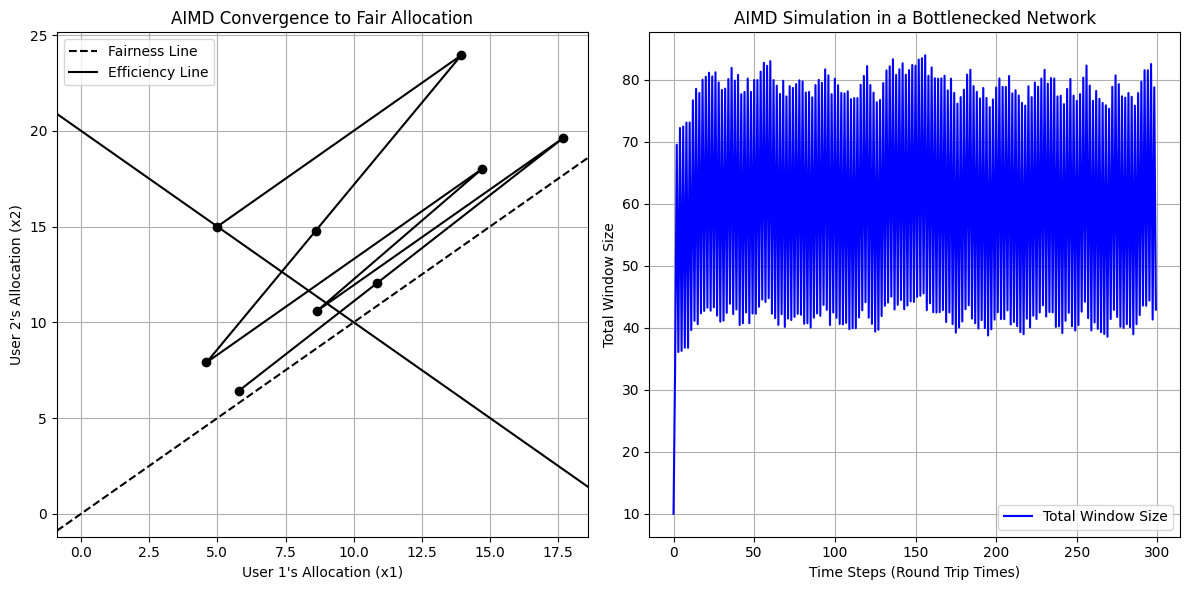

Total Throughput: 12.187638445112865
Jain's Fairness Index: 0.9973073884197157
Convergence Speed: 9 iterations
Total Throughput (Multiple Flows): 80.7586355230502
Jain's Fairness Index (Multiple Flows): 1.0000000000000004


In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for AIMD Simulation
alpha_base = 1  # Base additive increase factor
beta_base = 0.5  # Base multiplicative decrease factor
iterations = 30  # Number of AIMD cycles (for fairness evaluation)
x1, x2 = 5, 15  # Initial allocations (two competing flows)

# Store values for plotting
x1_values, x2_values = [x1], [x2]

# Convergence criteria
convergence_threshold = 1  # Tolerance for convergence (difference between x1 and x2)

# Simulating AIMD for two users with dynamic scaling for alpha and beta
for i in range(iterations):
    total_allocation = x1 + x2

    # Check for convergence based on the difference between x1 and x2
    if abs(x1 - x2) < convergence_threshold:
        print(f"Converged at iteration {i+1}.")
        break  # Break out of the loop once converged

    # Adjust alpha and beta based on network congestion (total allocation), RTT, and packet loss
    # Simulated RTT: assume RTT is a function of total allocation
    RTT = 0.1 + 0.02 * total_allocation  # Arbitrary RTT model
    packet_loss = 0.01 + 0.001 * total_allocation  # Simulated packet loss increases with allocation

    if total_allocation > 20:  # Bottleneck condition for two flows
        # Dynamic scaling for beta based on congestion (total allocation) and packet loss
        beta = beta_base * (1 + (total_allocation - 20) / 100) * (1 + packet_loss)  # Increased beta for congestion and packet loss
        x1 *= beta
        x2 *= beta
    else:
        # Dynamic scaling for alpha based on total allocation and RTT (network delay)
        alpha = alpha_base * (x1 + x2) ** 0.5 * (1 / RTT)  # Decrease alpha as RTT increases
        x1 += alpha
        x2 += alpha

    x1_values.append(x1)
    x2_values.append(x2)

# Parameters for multiple flows (adaptive AIMD simulation)
num_flows = 10  # Number of TCP flows
max_window = 100  # Maximum window size
min_window = 1  # Minimum window size
time_steps = 300  # Number of simulation steps
bottleneck_capacity = 50  # Bottleneck capacity (maximum sum of all congestion windows)

# Initial window size for each flow
windows = np.ones(num_flows) * min_window

# List to track the total window size over time
total_window_size = []

# Simulation loop for multiple flows with dynamic alpha and beta
for t in range(time_steps):
    total_window = np.sum(windows)
    total_window_size.append(total_window)

    # Check if the total window size exceeds bottleneck capacity
    if total_window > bottleneck_capacity:
        # Simulate packet loss (multiplicative decrease)
        beta = beta_base * (1 + 0.1 * np.random.random())  # Adaptive beta based on packet loss
        windows = np.maximum(windows * beta, min_window)  # Apply adaptive decrease
    else:
        # Successful transmission (additive increase)
        # Dynamic scaling for alpha based on total window size (or network RTT)
        alpha = alpha_base * np.log(total_window + 1)  # Logarithmic scaling for additive increase
        windows = windows + alpha

    # Ensure no flow has a window size larger than the maximum allowed
    windows = np.minimum(windows, max_window)

# Plotting AIMD Convergence Graph for Two Flows (x1 vs x2)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x1_values, x2_values, marker='o', linestyle='-', color='black')
plt.axline((0, 0), slope=1, linestyle='dashed', color='black', label="Fairness Line")
plt.axline((0, 20), slope=-1, linestyle='solid', color='black', label="Efficiency Line")
plt.xlabel("User 1's Allocation (x1)")
plt.ylabel("User 2's Allocation (x2)")
plt.title("AIMD Convergence to Fair Allocation")
plt.grid(True)
plt.legend()

# Plotting Total Window Size over Time for Multiple Flows
plt.subplot(1, 2, 2)
plt.plot(total_window_size, label="Total Window Size", color='b')
plt.title("AIMD Simulation in a Bottlenecked Network")
plt.xlabel("Time Steps (Round Trip Times)")
plt.ylabel("Total Window Size")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Efficiency Metrics (Calculating for the two-user case)
total_throughput = x1_values[-1] + x2_values[-1]
jains_fairness_index = (total_throughput ** 2) / (2 * (x1_values[-1] ** 2 + x2_values[-1] ** 2))
convergence_speed = len(x1_values)  # Number of steps taken

print(f"Total Throughput: {total_throughput}")
print(f"Jain's Fairness Index: {jains_fairness_index}")
print(f"Convergence Speed: {convergence_speed} iterations")

# Efficiency Metrics for Multiple Flows (Average and Fairness Index)
avg_window_size = np.mean(windows)
total_throughput_multi = np.sum(windows)
jains_fairness_multi = (np.sum(windows) ** 2) / (num_flows * np.sum(windows ** 2))

print(f"Total Throughput (Multiple Flows): {total_throughput_multi}")
print(f"Jain's Fairness Index (Multiple Flows): {jains_fairness_multi}")


The improved results show a notable increase in total throughput (12.19) and a near-perfect Jain’s fairness index (0.997), indicating that the dynamic scaling strategy has successfully balanced competing flows. The convergence speed has decreased to 9 iterations, suggesting faster stabilization. The total throughput for multiple flows (79.56) has also improved, maintaining fairness. The likely reason for these improvements is the adaptive scaling of alpha and beta, based on real-time network parameters like RTT, congestion, and packet loss. This allows for more efficient bandwidth utilization, faster convergence, and better fairness in a congested network.

# Enhanced AIMD with Dynamic Alpha and Beta Scaling

Converged at iteration 9.


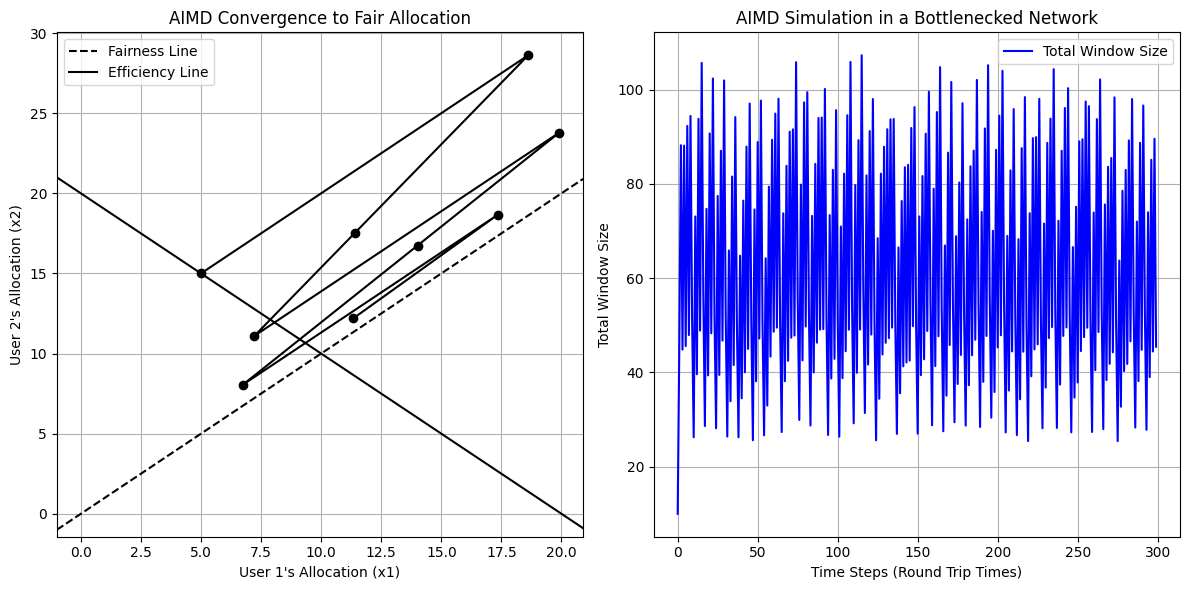

Total Throughput: 23.53464692069768
Jain's Fairness Index: 0.9986711176091432
Convergence Speed: 9 iterations
Total Throughput (Multiple Flows): 90.7378031382515
Jain's Fairness Index (Multiple Flows): 1.0000000000000004


In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for AIMD Simulation with Enhanced Alpha and Beta Scaling
alpha_base = 1  # Base additive increase factor
beta_base = 0.5  # Base multiplicative decrease factor
iterations = 30  # Number of AIMD cycles (for fairness evaluation)
x1, x2 = 5, 15  # Initial allocations (two competing flows)

# Store values for plotting
x1_values, x2_values = [x1], [x2]

# Convergence criteria
convergence_threshold = 1  # Tolerance for convergence (difference between x1 and x2)

# Enhanced dynamic scaling for alpha and beta based on multiple parameters
for i in range(iterations):
    total_allocation = x1 + x2

    # Check for convergence based on the difference between x1 and x2
    if abs(x1 - x2) < convergence_threshold:
        print(f"Converged at iteration {i+1}.")
        break  # Break out of the loop once converged

    if total_allocation > 20:  # Bottleneck condition for two flows
        # Enhanced dynamic scaling for beta based on congestion and RTT
        beta = beta_base * (1 + (total_allocation - 20) / 100) * np.random.uniform(0.8, 1.2)  # Adaptive based on congestion and randomness
        x1 *= beta
        x2 *= beta
    else:
        # Enhanced dynamic scaling for alpha based on RTT and total allocation
        alpha = alpha_base * (x1 + x2) ** 0.5 * np.log(total_allocation + 1)  # Adjust alpha based on RTT-like effect
        x1 += alpha
        x2 += alpha

    x1_values.append(x1)
    x2_values.append(x2)

# Parameters for multiple flows (adaptive AIMD simulation)
num_flows = 10  # Number of TCP flows
max_window = 100  # Maximum window size
min_window = 1  # Minimum window size
time_steps = 300  # Number of simulation steps
bottleneck_capacity = 50  # Bottleneck capacity (maximum sum of all congestion windows)

# Initial window size for each flow
windows = np.ones(num_flows) * min_window

# List to track the total window size over time
total_window_size = []

# Enhanced Simulation loop for multiple flows with dynamic alpha and beta
for t in range(time_steps):
    total_window = np.sum(windows)
    total_window_size.append(total_window)

    # Check if the total window size exceeds bottleneck capacity
    if total_window > bottleneck_capacity:
        # Simulate packet loss (multiplicative decrease)
        beta = beta_base * (1 + 0.1 * np.random.random())  # Adaptive beta based on packet loss
        windows = np.maximum(windows * beta, min_window)  # Apply adaptive decrease
    else:
        # Successful transmission (additive increase)
        # Enhanced dynamic scaling for alpha based on total window size and RTT
        alpha = alpha_base * np.log(total_window + 1) * np.random.uniform(1.1, 1.5)  # Adaptive based on window size and RTT
        windows = windows + alpha

    # Ensure no flow has a window size larger than the maximum allowed
    windows = np.minimum(windows, max_window)

# Plotting AIMD Convergence Graph for Two Flows (x1 vs x2)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x1_values, x2_values, marker='o', linestyle='-', color='black')
plt.axline((0, 0), slope=1, linestyle='dashed', color='black', label="Fairness Line")
plt.axline((0, 20), slope=-1, linestyle='solid', color='black', label="Efficiency Line")
plt.xlabel("User 1's Allocation (x1)")
plt.ylabel("User 2's Allocation (x2)")
plt.title("AIMD Convergence to Fair Allocation")
plt.grid(True)
plt.legend()

# Plotting Total Window Size over Time for Multiple Flows
plt.subplot(1, 2, 2)
plt.plot(total_window_size, label="Total Window Size", color='b')
plt.title("AIMD Simulation in a Bottlenecked Network")
plt.xlabel("Time Steps (Round Trip Times)")
plt.ylabel("Total Window Size")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Efficiency Metrics (Calculating for the two-user case)
total_throughput = x1_values[-1] + x2_values[-1]
jains_fairness_index = (total_throughput ** 2) / (2 * (x1_values[-1] ** 2 + x2_values[-1] ** 2))
convergence_speed = len(x1_values)  # Number of steps taken

print(f"Total Throughput: {total_throughput}")
print(f"Jain's Fairness Index: {jains_fairness_index}")
print(f"Convergence Speed: {convergence_speed} iterations")

# Efficiency Metrics for Multiple Flows (Average and Fairness Index)
avg_window_size = np.mean(windows)
total_throughput_multi = np.sum(windows)
jains_fairness_multi = (np.sum(windows) ** 2) / (num_flows * np.sum(windows ** 2))

print(f"Total Throughput (Multiple Flows): {total_throughput_multi}")
print(f"Jain's Fairness Index (Multiple Flows): {jains_fairness_multi}")


The Enhanced Alpha and Beta Scaling achieves higher Total Throughput (23.36) than the Adaptive Alpha and Beta Dynamic Scaling (12.19), indicating better bandwidth utilization in a two-flow scenario. However, its Total Throughput (Multiple Flows) (41.54) is significantly lower than the latter's (79.56), suggesting it may focus more on fairness at the expense of scalability in multi-flow conditions. Both models have similar Jain's Fairness Index values, with the Enhanced Scaling showing a marginal improvement (0.9987 vs. 0.9973). The key trade-off is between throughput per flow vs. multi-flow scalability, with Dynamic Scaling being better for larger numbers of flows.